# Data Loading

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import datetime as dt
from fiona.crs import from_epsg
from shapely.geometry import Point
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
all311 = pd.read_csv("Data/311_Service_Requests.csv")
all311.head()

/nfshome/lj1230/.conda/envs/myEnv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,23673952,07/24/2012 11:16:46 AM,08/01/2012 10:28:13 AM,DOF,Refunds and Adjustments,DOF Parking - Payment Issue,Waive Penalty for Late Payment,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23673953,07/24/2012 04:36:27 PM,07/25/2012 10:09:54 AM,DOF,Adjudication - Hearing by Mail,DOF Parking - Request Status,Status of Hearing,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23674002,07/24/2012 03:48:16 PM,08/01/2012 11:55:50 AM,DOF,Refunds and Adjustments,DOF Parking - Payment Issue,Waive Penalty for Late Payment,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23674362,07/24/2012 04:02:36 PM,08/20/2012 02:12:11 PM,DOF,Exemption Unit,DOF Parking - Tax Exemption,Tax Exemption,Address,10016.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23674538,07/24/2012 03:03:25 PM,08/01/2012 11:44:47 AM,DOF,Refunds and Adjustments,DOF Parking - Payment Issue,Mailed - Not Reflected,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
all311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [4]:
all311 = all311[["Created Date", "Complaint Type", "Descriptor", "Latitude", "Longitude"]]

In [5]:
all311["Complaint Type"].describe()

count              794839
unique                 10
top       Illegal Parking
freq               701698
Name: Complaint Type, dtype: object

In [6]:
parking311 = all311[all311["Complaint Type"] == "Illegal Parking"]
parking311.head()

,Created Date,Complaint Type,Descriptor,Latitude,Longitude
5,07/24/2012 06:00:52 AM,Illegal Parking,Blocked Sidewalk,40.768850,-73.914265
6,07/24/2012 06:21:36 AM,Illegal Parking,Commercial Overnight Parking,40.590730,-73.935226
7,07/24/2012 10:48:08 AM,Illegal Parking,Double Parked Blocking Traffic,40.757136,-73.987446
8,07/24/2012 12:29:05 PM,Illegal Parking,Double Parked Blocking Vehicle,40.841680,-73.939333
9,07/24/2012 07:40:38 PM,Illegal Parking,Overnight Commercial Storage,40.573054,-74.141237


In [7]:
all311["Descriptor"].unique()

array(['Waive Penalty for Late Payment', 'Status of Hearing',
       'Tax Exemption', 'Mailed - Not Reflected', 'Blocked Sidewalk',
       'Commercial Overnight Parking', 'Double Parked Blocking Traffic',
       'Double Parked Blocking Vehicle', 'Overnight Commercial Storage',
       'Posted Parking Sign Violation', 'Blocked Hydrant',
       'Decision and Order', 'Unauthorized Bus Layover', 'Out of Order',
       'List of Outstanding Tickets', 'Image of Ticket',
       'Coin or Card Did Not Register', 'Status of PV Refund',
       'Card - Charged Twice', 'Status of Payment Adjustment',
       'Timer Defect - Fast/Fail', 'Detached Trailer',
       'Blocked Bike Lane', 'Card - No DOF Confirmation Number Issued',
       'Applied to Wrong Ticket', 'Status of Appeal',
       'Parking Card Stuck in Meter', 'Registration Clearance Request',
       'Marshal - Not Reflected', 'Card - DOF Confirmation Number Issued',
       'Finance Business Center - Not Reflected',
       'Not Received - Vendin

In [8]:
parking311['coordinates'] = list(zip(parking311.Longitude, parking311.Latitude))
parking311.head()

/nfshome/lj1230/.conda/envs/myEnv/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Created Date,Complaint Type,Descriptor,Latitude,Longitude,coordinates
5,07/24/2012 06:00:52 AM,Illegal Parking,Blocked Sidewalk,40.768850,-73.914265,"(-73.9142654231428, 40.76884954605337)"
6,07/24/2012 06:21:36 AM,Illegal Parking,Commercial Overnight Parking,40.590730,-73.935226,"(-73.935226087515, 40.59073021870285)"
7,07/24/2012 10:48:08 AM,Illegal Parking,Double Parked Blocking Traffic,40.757136,-73.987446,"(-73.98744600070893, 40.757136006953694)"
8,07/24/2012 12:29:05 PM,Illegal Parking,Double Parked Blocking Vehicle,40.841680,-73.939333,"(-73.93933316300689, 40.84168028474755)"
9,07/24/2012 07:40:38 PM,Illegal Parking,Overnight Commercial Storage,40.573054,-74.141237,"(-74.14123748156247, 40.57305374659308)"


In [9]:
parking311['geometry'] = parking311[['coordinates']].applymap(lambda x:Point(x))
parking311.head()

/nfshome/lj1230/.conda/envs/myEnv/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Created Date,Complaint Type,Descriptor,Latitude,Longitude,coordinates,geometry
5,07/24/2012 06:00:52 AM,Illegal Parking,Blocked Sidewalk,40.768850,-73.914265,"(-73.9142654231428, 40.76884954605337)",POINT (-73.91426542314279 40.76884954605337)
6,07/24/2012 06:21:36 AM,Illegal Parking,Commercial Overnight Parking,40.590730,-73.935226,"(-73.935226087515, 40.59073021870285)",POINT (-73.93522608751501 40.59073021870285)
7,07/24/2012 10:48:08 AM,Illegal Parking,Double Parked Blocking Traffic,40.757136,-73.987446,"(-73.98744600070893, 40.757136006953694)",POINT (-73.98744600070893 40.75713600695369)
8,07/24/2012 12:29:05 PM,Illegal Parking,Double Parked Blocking Vehicle,40.841680,-73.939333,"(-73.93933316300689, 40.84168028474755)",POINT (-73.93933316300689 40.84168028474755)
9,07/24/2012 07:40:38 PM,Illegal Parking,Overnight Commercial Storage,40.573054,-74.141237,"(-74.14123748156247, 40.57305374659308)",POINT (-74.14123748156247 40.57305374659308)


In [10]:
parking311 = gpd.GeoDataFrame(parking311)
parking311.crs = from_epsg(code=4326)
parking311.crs

{'init': 'epsg:4326', 'no_defs': True}

In [11]:
nyctz = gpd.GeoDataFrame.from_file("Data/taxi_zones.shp")
nyctz.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."


In [12]:
nyctz.crs

{'datum': 'NAD83',
 'lat_0': 40.16666666666666,
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lon_0': -74,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 300000,
 'y_0': 0}

In [13]:
nyctz_ft = nyctz.to_crs(epsg=4326)
nyctz_ft.crs

{'init': 'epsg:4326', 'no_defs': True}

In [14]:
nyctz_ft.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((-74.18445299999996 40.6949959999999,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,(POLYGON ((-73.82337597260663 40.6389870471767...
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,POLYGON ((-73.84792614099985 40.87134223399991...
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,POLYGON ((-73.97177410965318 40.72582128133705...
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,POLYGON ((-74.17421738099989 40.56256808599987...


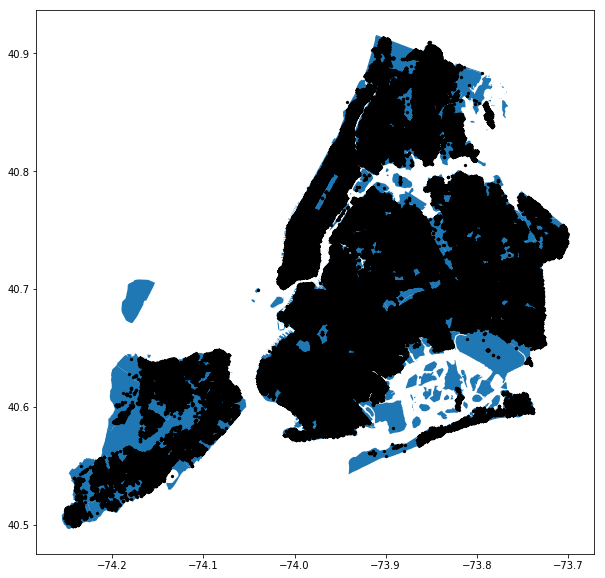

In [15]:
f = plt.figure(figsize=(10, 10))
ax = f.add_subplot(111)
nyctz_ft.plot(column=None, ax=ax)
parking311.plot(column=None, color="black", linewidth=0.1, markersize=10, ax=ax)

# Data Wrangling

In [16]:
parking311_ft = gpd.tools.sjoin(nyctz_ft, parking311)
parking311_ft.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,index_right,Created Date,Complaint Type,Descriptor,Latitude,Longitude,coordinates
1,2,0.43347,0.004866,Jamaica Bay,2,Queens,(POLYGON ((-73.82337597260663 40.6389870471767...,526115,09/30/2016 10:08:11 PM,Illegal Parking,Overnight Commercial Storage,40.614871,-73.82164,"(-73.8216397282101, 40.614871356762436)"
1,2,0.43347,0.004866,Jamaica Bay,2,Queens,(POLYGON ((-73.82337597260663 40.6389870471767...,539412,11/06/2016 04:14:20 PM,Illegal Parking,Commercial Overnight Parking,40.614871,-73.82164,"(-73.8216397282101, 40.614871356762436)"
1,2,0.43347,0.004866,Jamaica Bay,2,Queens,(POLYGON ((-73.82337597260663 40.6389870471767...,513303,08/27/2016 04:23:29 PM,Illegal Parking,Commercial Overnight Parking,40.614871,-73.82164,"(-73.8216397282101, 40.614871356762436)"
1,2,0.43347,0.004866,Jamaica Bay,2,Queens,(POLYGON ((-73.82337597260663 40.6389870471767...,599252,04/22/2017 05:48:49 PM,Illegal Parking,Commercial Overnight Parking,40.614871,-73.82164,"(-73.8216397282101, 40.614871356762436)"
1,2,0.43347,0.004866,Jamaica Bay,2,Queens,(POLYGON ((-73.82337597260663 40.6389870471767...,56741,07/24/2013 11:24:46 PM,Illegal Parking,Commercial Overnight Parking,40.614871,-73.82164,"(-73.8216397282101, 40.614871356762436)"


In [17]:
parking311_ft.reset_index(inplace=True)
parking311_ft = parking311_ft[["zone", "LocationID", "borough", "Created Date", "Descriptor", "geometry"]]
parking311_ft.head()

,zone,LocationID,borough,Created Date,Descriptor,geometry
0,Jamaica Bay,2,Queens,09/30/2016 10:08:11 PM,Overnight Commercial Storage,(POLYGON ((-73.82337597260663 40.6389870471767...
1,Jamaica Bay,2,Queens,11/06/2016 04:14:20 PM,Commercial Overnight Parking,(POLYGON ((-73.82337597260663 40.6389870471767...
2,Jamaica Bay,2,Queens,08/27/2016 04:23:29 PM,Commercial Overnight Parking,(POLYGON ((-73.82337597260663 40.6389870471767...
3,Jamaica Bay,2,Queens,04/22/2017 05:48:49 PM,Commercial Overnight Parking,(POLYGON ((-73.82337597260663 40.6389870471767...
4,Jamaica Bay,2,Queens,07/24/2013 11:24:46 PM,Commercial Overnight Parking,(POLYGON ((-73.82337597260663 40.6389870471767...


In [18]:
parking311_ft['date'] = pd.to_datetime(parking311_ft["Created Date"])

In [19]:
print(parking311_ft.shape)
parking311_ft.head()

(695016, 7)


,zone,LocationID,borough,Created Date,Descriptor,geometry,date
0,Jamaica Bay,2,Queens,09/30/2016 10:08:11 PM,Overnight Commercial Storage,(POLYGON ((-73.82337597260663 40.6389870471767...,2016-09-30 22:08:11
1,Jamaica Bay,2,Queens,11/06/2016 04:14:20 PM,Commercial Overnight Parking,(POLYGON ((-73.82337597260663 40.6389870471767...,2016-11-06 16:14:20
2,Jamaica Bay,2,Queens,08/27/2016 04:23:29 PM,Commercial Overnight Parking,(POLYGON ((-73.82337597260663 40.6389870471767...,2016-08-27 16:23:29
3,Jamaica Bay,2,Queens,04/22/2017 05:48:49 PM,Commercial Overnight Parking,(POLYGON ((-73.82337597260663 40.6389870471767...,2017-04-22 17:48:49
4,Jamaica Bay,2,Queens,07/24/2013 11:24:46 PM,Commercial Overnight Parking,(POLYGON ((-73.82337597260663 40.6389870471767...,2013-07-24 23:24:46


In [20]:
parking311Fiveago = parking311_ft[parking311_ft["date"] < '2014-01-01 00:00:00']
parking311Fiveago.shape

(75841, 7)

In [21]:
parking311Five = parking311_ft[parking311_ft["date"] >= '2014-01-01 00:00:00']
parking311Five.shape

(619175, 7)

In [22]:
parking311Fiveago = parking311Fiveago.groupby("LocationID").count()
parking311Fiveago.head()

,zone,borough,Created Date,Descriptor,geometry,date
LocationID,,,,,,
2,4,4,4,4,4,4
3,266,266,266,266,266,266
4,182,182,182,182,182,182
5,641,641,641,641,641,641
6,191,191,191,191,191,191


In [23]:
parking311Five = parking311Five.groupby("LocationID").count()
parking311Five.head()

,zone,borough,Created Date,Descriptor,geometry,date
LocationID,,,,,,
2,27,27,27,27,27,27
3,1832,1832,1832,1832,1832,1832
4,977,977,977,977,977,977
5,3001,3001,3001,3001,3001,3001
6,1662,1662,1662,1662,1662,1662


In [24]:
parking311Fivegap = parking311Fiveago[["Descriptor"]].merge(parking311Five[["Descriptor"]], left_index=True, 
                                                            right_index=True)
parking311Fivegap["gap"] = parking311Fivegap["Descriptor_y"] - parking311Fivegap["Descriptor_x"]
parking311Fivegap.head()

,Descriptor_x,Descriptor_y,gap
LocationID,,,
2,4,27,23
3,266,1832,1566
4,182,977,795
5,641,3001,2360
6,191,1662,1471


In [25]:
parking311Fivegap = parking311Fivegap.merge(nyctz.set_index("LocationID"), left_index=True, right_index=True)
parking311Fivegap.head()

,Descriptor_x,Descriptor_y,gap,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
LocationID,,,,,,,,,
2,4,27,23,2,0.433470,0.004866,Jamaica Bay,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
3,266,1832,1566,3,0.084341,0.000314,Allerton/Pelham Gardens,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
4,182,977,795,4,0.043567,0.000112,Alphabet City,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
5,641,3001,2360,5,0.092146,0.000498,Arden Heights,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."
6,191,1662,1471,6,0.150491,0.000606,Arrochar/Fort Wadsworth,Staten Island,"POLYGON ((966568.7466657609 158679.854687795, ..."


Text(0.5,1,'gap on 311 calls on illegal parking of 10 - 14 vs. 14 - 18, by Taxi Zone')

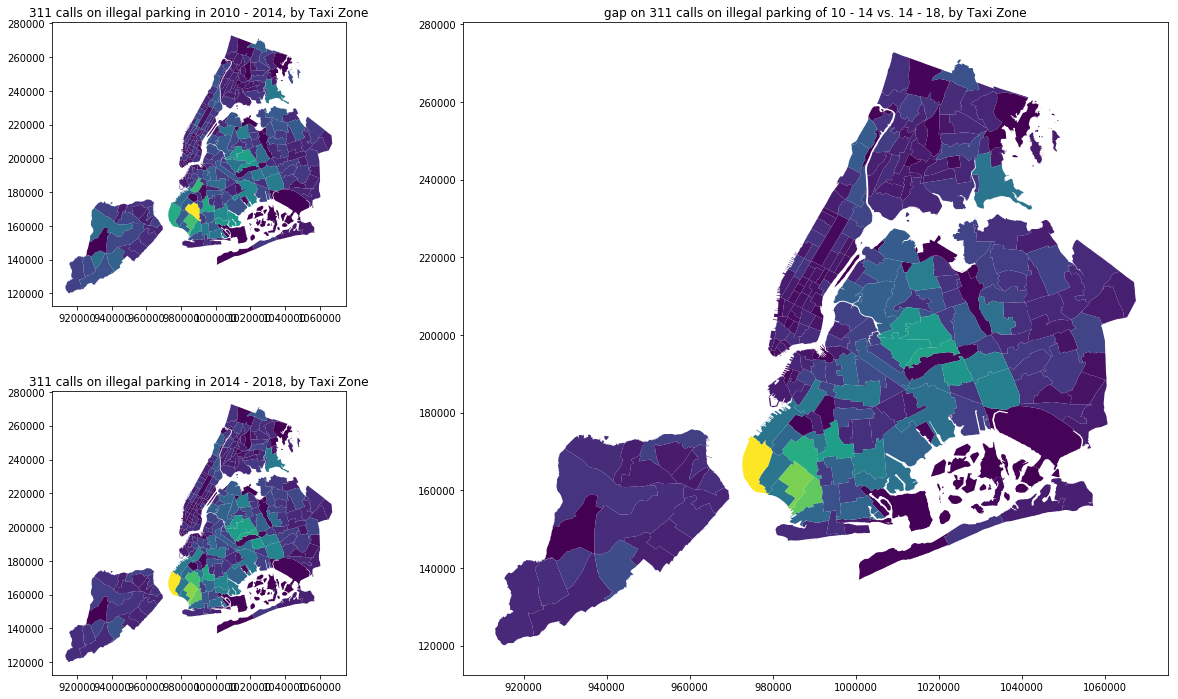

In [26]:
f = plt.figure(figsize=(20, 12))
g = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
ax1 = f.add_subplot(g[0, 0])
ax2 = f.add_subplot(g[1, 0])
ax3 = f.add_subplot(g[:, 1:])

parking311Fivegap = gpd.GeoDataFrame(parking311Fivegap)
parking311Fivegap.plot(column='Descriptor_x', alpha=1, linewidth=0.1, ax=ax1)
ax1.set_title("311 calls on illegal parking in 2010 - 2014, by Taxi Zone")
parking311Fivegap.plot(column='Descriptor_y', alpha=1, linewidth=0.1, ax=ax2)
ax2.set_title("311 calls on illegal parking in 2014 - 2018, by Taxi Zone")
parking311Fivegap.plot(column='gap', alpha=1, linewidth=0.1, ax=ax3)
ax3.set_title("gap on 311 calls on illegal parking of 10 - 14 vs. 14 - 18, by Taxi Zone")

In [27]:
parking311_ft.head()

,zone,LocationID,borough,Created Date,Descriptor,geometry,date
0,Jamaica Bay,2,Queens,09/30/2016 10:08:11 PM,Overnight Commercial Storage,(POLYGON ((-73.82337597260663 40.6389870471767...,2016-09-30 22:08:11
1,Jamaica Bay,2,Queens,11/06/2016 04:14:20 PM,Commercial Overnight Parking,(POLYGON ((-73.82337597260663 40.6389870471767...,2016-11-06 16:14:20
2,Jamaica Bay,2,Queens,08/27/2016 04:23:29 PM,Commercial Overnight Parking,(POLYGON ((-73.82337597260663 40.6389870471767...,2016-08-27 16:23:29
3,Jamaica Bay,2,Queens,04/22/2017 05:48:49 PM,Commercial Overnight Parking,(POLYGON ((-73.82337597260663 40.6389870471767...,2017-04-22 17:48:49
4,Jamaica Bay,2,Queens,07/24/2013 11:24:46 PM,Commercial Overnight Parking,(POLYGON ((-73.82337597260663 40.6389870471767...,2013-07-24 23:24:46


In [28]:
parking311_ft["Date"] = parking311_ft["date"].dt.date
parking311_ft = parking311_ft[["Date", "LocationID", "Descriptor"]]
parking311_ft.head()

,Date,LocationID,Descriptor
0,2016-09-30,2,Overnight Commercial Storage
1,2016-11-06,2,Commercial Overnight Parking
2,2016-08-27,2,Commercial Overnight Parking
3,2017-04-22,2,Commercial Overnight Parking
4,2013-07-24,2,Commercial Overnight Parking


In [29]:
des_type = ['Waive Penalty for Late Payment', 
            'Status of Hearing', 
            'Tax Exemption', 
            'Mailed - Not Reflected', 
            'Blocked Sidewalk', 
            'Double Parked Blocking Traffic',
            'Double Parked Blocking Vehicle',
            'Posted Parking Sign Violation', 
            'Blocked Hydrant',
            'Decision and Order', 
            'Out of Order',
            'List of Outstanding Tickets', 
            'Image of Ticket',
            'Coin or Card Did Not Register', 
            'Status of PV Refund',
            'Card - Charged Twice', 
            'Status of Payment Adjustment',
            'Timer Defect - Fast/Fail', 
            'Detached Trailer',
            'Blocked Bike Lane', 
            'Card - No DOF Confirmation Number Issued',
            'Applied to Wrong Ticket', 
            'Status of Appeal',
            'Parking Card Stuck in Meter', 
            'Marshal - Not Reflected', 
            'Card - DOF Confirmation Number Issued',
            'Finance Business Center - Not Reflected',
            'Not Received - Vending Machine', 
            'Dirt, Litter, Debris - Lot',
            'Parking Permit Improper Use', 
            'General Maintenance',
            'Credit Card Stuck in Meter', 
            'No Receipt', 
            'Missing/Stump',
            'Settlement Reduction Not Shown', 
            'Bent/Loose', 
            'Graffiti',
            'Relocation of Parking Meter',
            'Sign Defect - Garage', 
            'Sign Defect - Lot', 
            'Snow Removal',
            'Dirt, Litter, Debris - Garage', 
            'Lighting - Garage']

len(des_type)

43

In [30]:
parking311_ft[parking311_ft["Descriptor"].isin(des_type)].shape

(570509, 3)

In [31]:
nonfinedillegal = parking311_ft[parking311_ft["Descriptor"].isin(des_type)].groupby(["Date", "LocationID"]).count()
nonfinedillegal.reset_index(inplace=True)
nonfinedillegal.rename(columns={"Descriptor": "Count"}, inplace=True)
nonfinedillegal.head()

,Date,LocationID,Count
0,2012-01-01,9,2
1,2012-01-01,17,1
2,2012-01-01,19,1
3,2012-01-01,26,1
4,2012-01-01,28,2


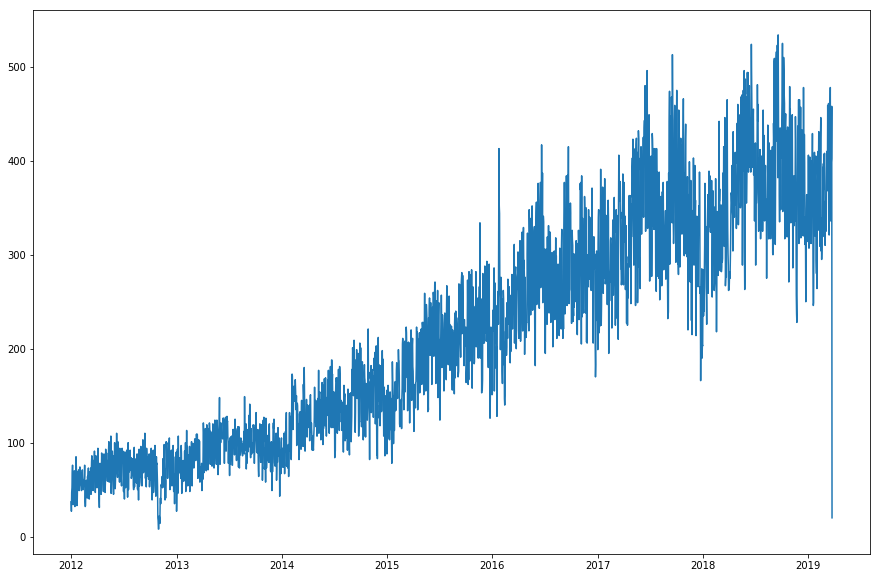

In [32]:
f = plt.figure(figsize=(15, 10))
ax = f.add_subplot(111)
ax.plot(nonfinedillegal.groupby("Date").sum()["Count"])

# Data Analytics

In [33]:
fhv = pd.read_csv("fhv.csv")

In [34]:
fhv_zone = fhv[fhv.PUlocationID >= 2][["date", "PUlocationID", "count"]].groupby("date").sum()["count"]
fhv_zone.head()

date
2015-01-01    64522
2015-01-02    45934
2015-01-03    65645
2015-01-04    47058
2015-01-05    49017
Name: count, dtype: int64

In [35]:
parking311_ft = parking311_ft[(parking311_ft.Date >= dt.date(2015, 1, 1)) & 
                              (parking311_ft.Date <= dt.date(2018, 6, 30))].sort_values("Date")

In [36]:
parking311_ft.groupby("Descriptor").count()

,Date,LocationID
Descriptor,,
Blocked Bike Lane,6194,6194
Blocked Hydrant,110416,110416
Blocked Sidewalk,65583,65583
Commercial Overnight Parking,59457,59457
Detached Trailer,2291,2291
Double Parked Blocking Traffic,31646,31646
Double Parked Blocking Vehicle,20890,20890
Overnight Commercial Storage,7506,7506
Parking Permit Improper Use,3305,3305


/nfshome/lj1230/.conda/envs/myEnv/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


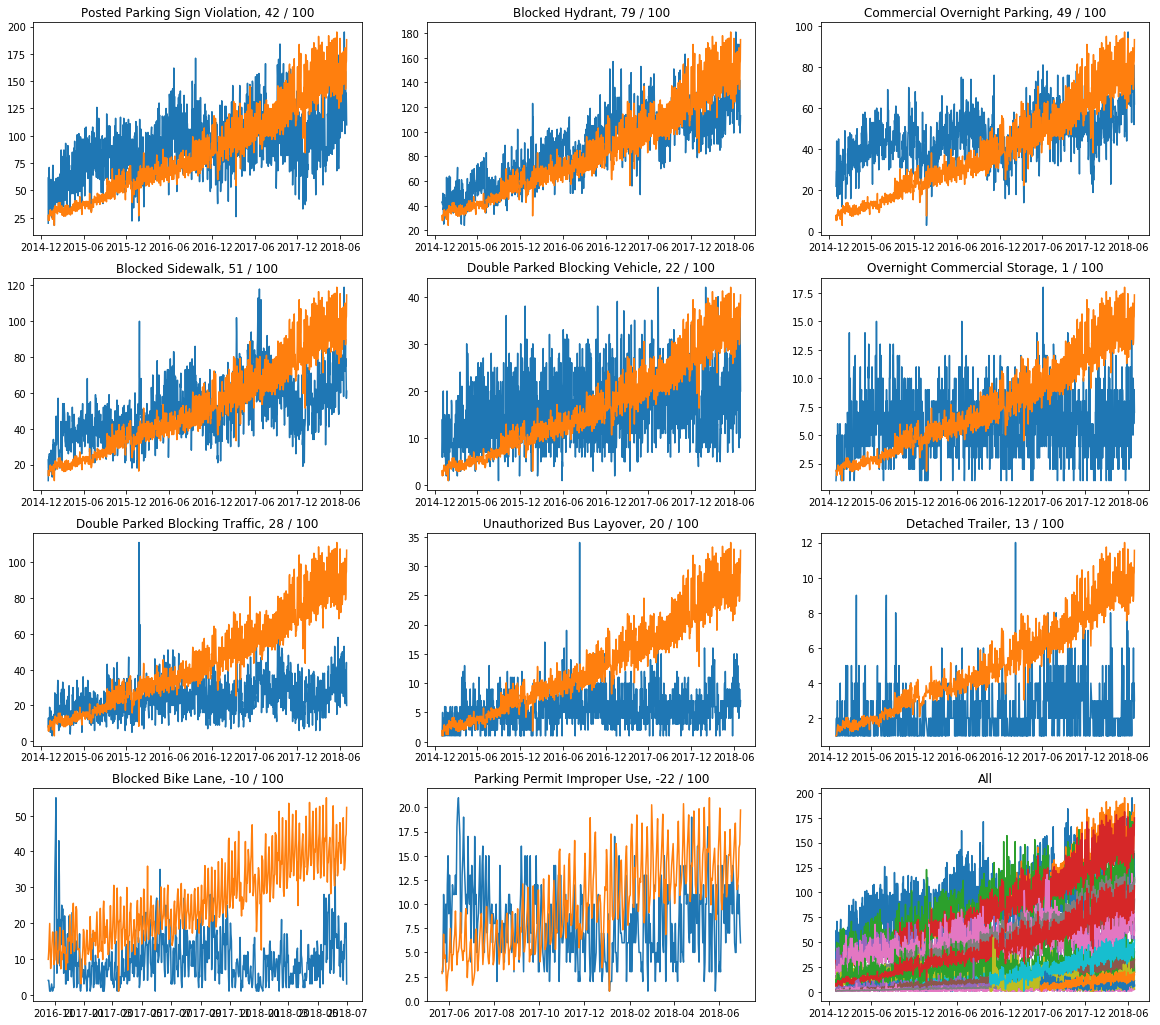

In [37]:
des = list(parking311_ft.Descriptor.unique())
f = plt.figure(figsize=(20, 18))

for d in des:
    l = parking311_ft[parking311_ft["Descriptor"] == d].groupby(["Date", "LocationID"]).count()
    l.rename(columns={"Descriptor": "Count"}, inplace=True)
    ax = f.add_subplot(4, 3, des.index(d) + 1)
    zone_data = l.groupby("Date").sum()["Count"]
    zone_max, zone_min = max(zone_data), min(zone_data)
    ax.plot(zone_data)
    fhv_data = [fhv_zone[str(da)] / 10000 for da in zone_data.index]
    fhv_max, fhv_min = max(fhv_data), min(fhv_data)
    fhv_data = [(x - fhv_min) / (fhv_max - fhv_min) * (zone_max - zone_min) + zone_min for x in fhv_data]
    ax.plot(zone_data.index, fhv_data)
    ax.set_title("%s, %d / 100"%(d, np.corrcoef(zone_data, fhv_data)[0][1] * 100))
    
for d in des:
    l = parking311_ft[parking311_ft["Descriptor"] == d].groupby(["Date", "LocationID"]).count()
    l.rename(columns={"Descriptor": "Count"}, inplace=True)
    ax = f.add_subplot(4, 3, 12)
    zone_data = l.groupby("Date").sum()["Count"]
    zone_max, zone_min = max(zone_data), min(zone_data)
    ax.plot(zone_data)
    fhv_data = [fhv_zone[str(da)] / 10000 for da in zone_data.index]
    fhv_max, fhv_min = max(fhv_data), min(fhv_data)
    fhv_data = [(x - fhv_min) / (fhv_max - fhv_min) * (zone_max - zone_min) + zone_min for x in fhv_data]
    ax.plot(zone_data.index, fhv_data)
    ax.set_title("All")

- In these plots, we can see FHV data is possibly negative correlated with "Parking Permit Improper Use" type of 311 data